# Projeto 1 - Ciência dos dados

### Giovanna Sardella Cabral | 2A Engenharia

** Pergunta:** Existem dois possíveis fatores para ter maior número de bilionários: o país é rico e por isso tem mais bilionários ou o país tem muita desigualdade social e IDH baixo, tendo muitos bilionários e muitos pobres. Além disso, acredita-se que países com maior taxa de inflação tenham IDH menor. Assim, a inflação e o número de bilionários tem influência ou não no IDH de um país?

# IDH, Inflação e número de bilionários
Foram coletados 3 dados do site https://www.gapminder.org/:
1. IDH(índice de desenvolvimento humano)
2. Inflação
3. Número de bilionários a cada 1 milhão de pessoas

Nesses dataframes, as linhas representam os países, as colunas representam o ano de 2007.
No dataframe IDH criado a seguir, o conteúdo de cada célula é a medida do IDH de um determinado ano (coluna) para determinado país (linha).

No dataframe inflation criado a seguir, o conteúdo de cada célula é a medida da inflação de um determinado ano (coluna) para um determinado país (linha). 

No dataframe billionaires criado a seguir, o conteúdo de cada célula é o número de bilionários de um determinado ano (coluna) para um determinado país (linha). 



# Introdução
O intuito desse projeto é analisar outros fatores que não caracterizam o IDH diretamente e observar se existe uma correlação entre estes e o IDH. Consequentemente, será possível identificar se a inflação e o número de bilionários interferem no IDH. 
O senso comum faz com que parte da população acredite que quanto menor o índice de desenvolvimento humano, maior a inflação e quanto menor o número de bilionários em um país, menor o IDH. Assim, o estudo e análise desses dados tem como objetivo verificar se isto é realmente verdaderiro. 

Acredito que os países que tiverem menor IDH terão menor número de bilionários e maior taxa de inflação. Portanto, resolvi investigar a relação do IDH com a inflação e o número de bilionários, pois acho que quando a taxa de inflação sobe deveria diminuir o IDH de um país, assim como o aumento do IDH deveria aumentar o número de bilionários em um país.  

# Leitura dos arquivos e mudanças de índices

In [607]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [608]:
#Leitura dos arquivos em Excel
IDH = pd.read_excel('hdi_human_development_index.xlsx')
inflation = pd.read_excel('inflation_annual_percent.xlsx')
billionaires = pd.read_excel('dollar_billionaires.xlsx')

# IDH
É possível verificar que cada linha representa um país e as colunas representam o ano de 2007

In [609]:
IDH = IDH.loc[:, ["geo", 2007]]
IDH= IDH.rename(columns = {'geo':'País', 2007:'IDH em 2007'})
IDH.head(4)


,País,IDH em 2007
0,Afghanistan,0.433
1,Albania,0.713
2,Algeria,0.697
3,Andorra,NaN


# Inflação
É possível verificar que cada linha representa um país e as colunas representam o ano de 2007

In [610]:
inflation = inflation.loc[:, ["geo", 2007]]
inflation = inflation.rename(columns = {'geo':'País', 2007:'Inflação em 2007'})
inflation.head(4)


,País,Inflação em 2007
0,Afghanistan,22.40
1,Albania,3.58
2,Algeria,6.42
3,Andorra,3.87


# Número de bilionários a cada 1 milhão de pessoas
É possível verificar que cada linha representa um país e as colunas representam o ano de 2007

In [611]:
billionaires = billionaires.loc[:, ["geo", 2007]]
billionaires = billionaires.rename(columns = {'geo':'País', 2007:'Bilionários em 2007'})
billionaires.head(10)
billionaires_sem0 = billionaires[billionaires["Bilionários em 2007"] != 0]
billionaires_sem0

,País,Bilionários em 2007
6,Argentina,0.02480
8,Australia,0.58700
9,Austria,0.36600
16,Belgium,0.19300
23,Brazil,0.10500
30,Canada,0.68900
34,Chile,0.18400
35,China,0.01520
36,Colombia,0.04520
44,Cyprus,2.54000


** explicação: ** Para a análise dos dados com melhor coerência, os países que não têm bilionários foram retirados do dataframe billionaires

# Inner join
Aqui os três dados coletados estarão na mesma tabela.

In [612]:
IDH_idx = IDH.set_index('País')
inflation_idx = inflation.set_index('País')
billionaires_idx=billionaires_sem0.set_index("País")
df = IDH_idx.join(inflation_idx, how='inner', lsuffix=' ', rsuffix=' ')
df.head(10)

,IDH em 2007,Inflação em 2007
País,,
Afghanistan,0.433,22.40
Albania,0.713,3.58
Algeria,0.697,6.42
Andorra,NaN,3.87
Angola,0.468,12.60
Antigua and Barbuda,0.786,3.74
Argentina,0.792,14.90
Armenia,0.721,4.23
Australia,0.921,4.98


In [613]:
data = df.join(billionaires_idx, how="inner")
data.head(10)

,IDH em 2007,Inflação em 2007,Bilionários em 2007
País,,,
Argentina,0.792,14.90,0.0248
Australia,0.921,4.98,0.5870
Austria,0.864,2.33,0.3660
Belgium,0.874,2.01,0.1930
Brazil,0.704,6.44,0.1050
Canada,0.897,3.32,0.6890
Chile,0.804,5.34,0.1840
China,0.672,7.81,0.0152
Colombia,0.683,5.04,0.0452


# Análise e explicação dos resultados
Para a análise dos dados e melhor visualização desses, gráficos e outros recursos, como boxplot e histograma serão utilizados. 

In [614]:
def reta(dados_x, dados_y, nome_x = "Eixo X", nome_y = "Eixo Y"):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

### Gráfico de dispersão sobre a Inflação em 2007 pelo IDH em 2007 ###

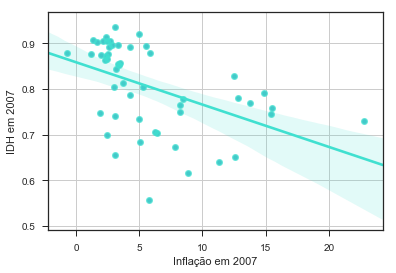

In [615]:
data.plot.scatter(x='Inflação em 2007',y='IDH em 2007');
sns.regplot(data["Inflação em 2007"],data["IDH em 2007"], color=('turquoise'))
plt.grid()

** Correlação entre Inflação em 2007 e IDH em 2007 **

In [616]:
print('A correlação entre o IDH em 2007 e a inflação em 2007 é:', data['IDH em 2007'].corr(data['Inflação em 2007']))
data.loc[:,["IDH em 2007", "Inflação em 2007"]].corr()


A correlação entre o IDH em 2007 e a inflação em 2007 é: -0.4702330603697849


,IDH em 2007,Inflação em 2007
IDH em 2007,1.000000,-0.470233
Inflação em 2007,-0.470233,1.000000


#### Análise ####
A partir do valor r=-0.4702 de correlação entre o IDH em 2007 e a inflação em 2007, verificado na tabela, observa-se uma assosiação negativa moderada entre inflação e IDH. É possível confirmar isto observando o gráfico de dispersão. Como conseguinte, foi possível verificar que o conhecimento prévio de que a inflação influencia significantemente no IDH de um país não é totalmente verdadadeira, porque o índice de correlação não é tão alto como acreditam.

### Gráfico de dispersão sobre o número de bilionários em 2007 pelo IDH em 2007 ###

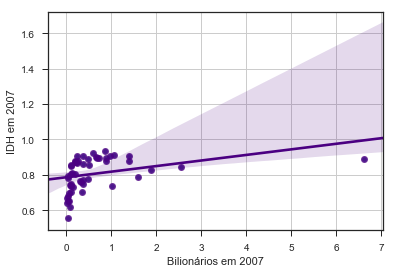

In [617]:
data.plot.scatter(x="Bilionários em 2007",y='IDH em 2007');
sns.regplot(data["Bilionários em 2007"],data["IDH em 2007"], color=('indigo'))
plt.grid()

** Correlação entre Bilionários em 2007 e IDH em 2007 **

In [618]:
print('A correlação entre o IDH em 2007 e o número de bilionários em 2007 é:', data['IDH em 2007'].corr(data['Bilionários em 2007']))
data.loc[:,["IDH em 2007", "Bilionários em 2007"]].corr()

A correlação entre o IDH em 2007 e o número de bilionários em 2007 é: 0.338615711000053


,IDH em 2007,Bilionários em 2007
IDH em 2007,1.000000,0.338616
Bilionários em 2007,0.338616,1.000000


#### Análise ####
A partir do valor r=0.338615 de correlação entre o número de bilionários em 2007 e o IDH em 2007, verificado na tabela, observa-se uma assosiação positiva moderada entre número de bilionários e IDH. É possível confirmar isto observando o gráfico de dispersão. Como consequência, foi possível verificar que o conhecimento prévio de que quanto maior o IDH de um país, mais bilionários não é totalmente verdadadeira, porque o índice de correlação não é tão alto como acreditam. Portanto, é mais provável que vários países com alto número de bilionários tenham desiguladade social no país. 

No entanto, verifica-se que há um outlier que pode atrapalhar na análise dos dados. Assim, para aprimorar o resultado tirei os dois outliers que estavam alterando a análise dos dados. Esses dois outliers são os países Mônaco e Islândia, os quais têm muitos bilionários e poucos habitantes, por isso que no calculo de quantos bilionários tem em um país, a cada 1 milhão de pessoas, Monaco ficou com 30.6 bilionários enquanto Islândia ficou com 6.62. No entanto, os demais países ficaram com o número de bilionários em torno de 1, por isso o gráfico ficou com pontos muito próximos uns dos outros, enquanto alguns se distanciavam muito. 


A correlação entre o IDH em 2007 e o número de bilionários em 2007 é: 0.43318689607331423


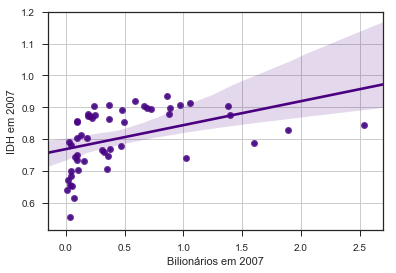

In [619]:
data_sem_monaco = data[data['Bilionários em 2007'] <= 3]
data_sem_monaco.plot.scatter(x="Bilionários em 2007",y='IDH em 2007');
sns.regplot(data_sem_monaco["Bilionários em 2007"],data_sem_monaco["IDH em 2007"], color=('indigo'))
plt.grid()

print('A correlação entre o IDH em 2007 e o número de bilionários em 2007 é:', data_sem_monaco['IDH em 2007'].corr(data_sem_monaco['Bilionários em 2007']))


** Análise dos dados sem Mônaco e Islândia: ** Com a retirada de Monaco e Islândia do dataframe verifica-se que ocorreu uma mudança no índice de correlação entre o IDH em 2007 e o número de bilionários em 2007, o qual ficou com o valor maior que o anterior e igual a r=0.4331. Assim, observa-se uma assosiação positiva moderada  entre número de bilionários e IDH. É possível confirmar isto observando o gráfico de dispersão.

### Gráfico de dispersão sobre o número de bilionários em 2007 pela inflação em 2007 ###

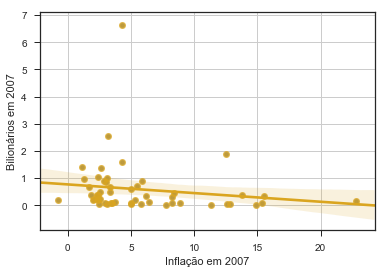

In [620]:
data.plot.scatter(x='Inflação em 2007',y='Bilionários em 2007');
sns.regplot(data["Inflação em 2007"],data["Bilionários em 2007"], color=('goldenrod'))
plt.grid()


** Correlação entre Bilionários em 2007 e inflação em 2007 **

In [621]:
print('A correlação entre a inflação em 2007 e o número de bilionários em 2007 é:', data['Inflação em 2007'].corr(data['Bilionários em 2007']))
data.loc[:,["Inflação em 2007", "Bilionários em 2007"]].corr()

A correlação entre a inflação em 2007 e o número de bilionários em 2007 é: -0.1505400093040642


,Inflação em 2007,Bilionários em 2007
Inflação em 2007,1.00000,-0.15054
Bilionários em 2007,-0.15054,1.00000


#### Análise ####
A partir do valor r=-0.15054 de correlação entre o número de bilionários em 2007 e a inflação em 2007, verificado na tabela, observa-se uma assosiação negativa baixa entre número de bilionários e a inflação. É possível confirmar isto observando o gráfico de dispersão. Como consequência, foi possível verificar que a inflação pouco influencia no número de bilionários em um país. 

Para melhorar a análise dos dados tirei Monaco e Islândia desse gráfico de dispersão também, para observar a mudança que isso traz para os dados


A correlação entre a Inflação em 2007 e o número de bilionários em 2007 é: -0.21438573905691444


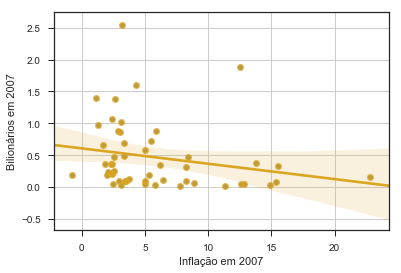

In [622]:
data_sem_monaco.plot.scatter(x='Inflação em 2007',y='Bilionários em 2007');
sns.regplot(data_sem_monaco["Inflação em 2007"],data_sem_monaco["Bilionários em 2007"], color=('goldenrod'))
plt.grid()

print('A correlação entre a Inflação em 2007 e o número de bilionários em 2007 é:', data_sem_monaco['Inflação em 2007'].corr(data_sem_monaco['Bilionários em 2007']))


** Análise dos dados sem Mônaco e Islândia: ** Com a retirada de Mônaco e Islândia do dataframe verifica-se que ocorreu uma mudança no índice de correlação entre a Inflação em 2007 e o número de bilionários em 2007, o qual ficou com o valor mais próximo de -1 que o anterior e igual a r=-0.214. Assim, observa-se uma assosiação negativa baixa entre número de bilionários e a inflação. É possível confirmar isto observando o gráfico de dispersão.

### Boxplot e histograma do IDH em 2007 ###

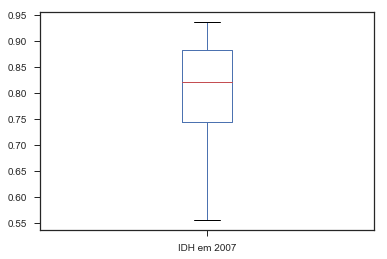

In [623]:
data.loc[:, 'IDH em 2007'].plot.box()

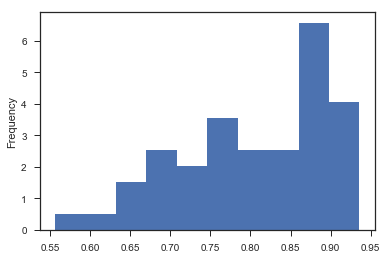

In [624]:
data["IDH em 2007"].plot.hist(density=True);

** Análise: ** Verifica-se a partir do boxplot que não há nenhum ponto considerado extremo e que ocorre uma assimetria para a esquerda. É possível verificar isso com mais clareza ao observar o histograma. 

### Boxplot e histograma da inflação em 2007 ###

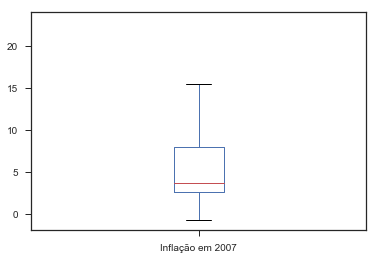

In [625]:
data.loc[:, 'Inflação em 2007'].plot.box()

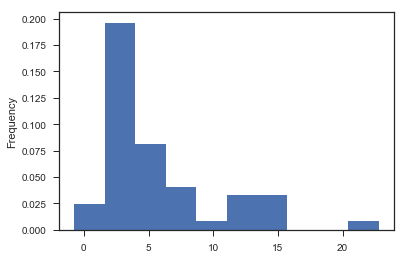

In [626]:
data["Inflação em 2007"].plot.hist(density=True);

** Análise: ** Verifica-se a partir do boxplot que há um ponto considerado extremo e que ocorre uma assimetria para a direita. É possível verificar isso com mais clareza ao observar o histograma. 

### Boxplot e histograma do número de bilionários em 2007 ###

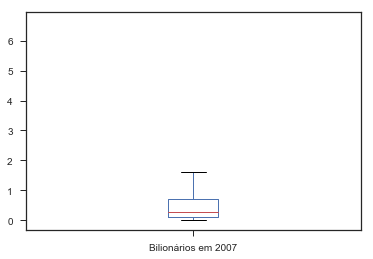

In [627]:
data.loc[:, 'Bilionários em 2007'].plot.box()

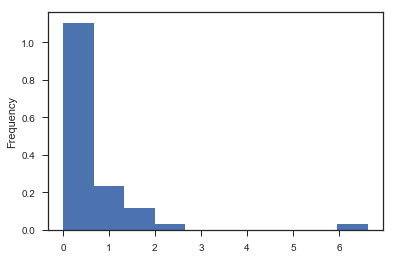

In [628]:
data["Bilionários em 2007"].plot.hist(density=True);

** Análise: ** Verifica-se a partir do boxplot que há 3 pontos considerados extremos, que seriam Monaco, Islândia e Chipre, e que ocorre uma assimetria para a direita. É possível verificar isso com mais clareza ao observar o histograma. 

# Evolução da análise temporalmente

## 2008 ##

### Dados ###

In [629]:
IDH = pd.read_excel('hdi_human_development_index.xlsx')
IDH = IDH.loc[:, ["geo", 2006]]
IDH= IDH.rename(columns = {'geo':'País', 2006:'IDH em 2006'})
inflation = pd.read_excel('inflation_annual_percent.xlsx')
inflation = inflation.loc[:, ["geo", 2006]]
inflation = inflation.rename(columns = {'geo':'País', 2006:'Inflação em 2006'})
billionaires = pd.read_excel('dollar_billionaires.xlsx')
billionaires = billionaires.loc[:, ["geo", 2006]]
billionaires = billionaires.rename(columns = {'geo':'País', 2006:'Bilionários em 2006'})
billionaires_sem0 = billionaires[billionaires["Bilionários em 2006"] != 0]
IDH_idx = IDH.set_index('País')
inflation_idx = inflation.set_index('País')
billionaires_idx=billionaires_sem0.set_index("País")
df = IDH_idx.join(inflation_idx, how='inner', lsuffix=' ', rsuffix=' ')
data = df.join(billionaires_idx, how="inner")

### Gráfico de dispersão sobre a Inflação em 2006 pelo IDH em 2006###

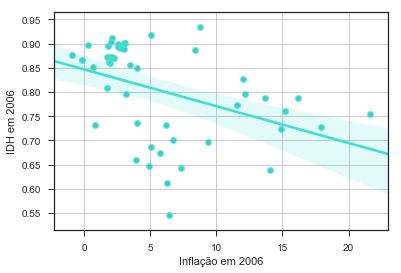

In [630]:
data.plot.scatter(x='Inflação em 2006',y='IDH em 2006');
sns.regplot(data["Inflação em 2006"],data["IDH em 2006"], color=('turquoise'))
plt.grid()

### Correlação entre IDH em 2006 e a Inflação em 2006 ###

In [631]:
print('A correlação entre o IDH em 2006 e a inflação em 2006 é:', data['IDH em 2006'].corr(data['Inflação em 2006']))
data.loc[:,["IDH em 2006", "Inflação em 2006"]].corr()

A correlação entre o IDH em 2006 e a inflação em 2006 é: -0.41200417041432313


,IDH em 2006,Inflação em 2006
IDH em 2006,1.000000,-0.412004
Inflação em 2006,-0.412004,1.000000


### Gráfico de dispersão sobre o número de bilionários em 2006 pelo IDH em 2006 ###

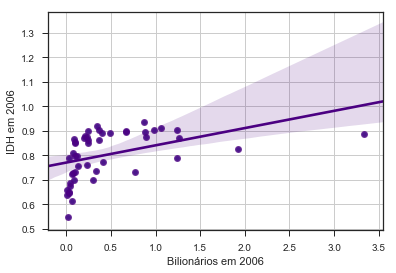

In [632]:
data.plot.scatter(x="Bilionários em 2006",y='IDH em 2006');
sns.regplot(data["Bilionários em 2006"],data["IDH em 2006"], color=('indigo'))
plt.grid()

#### Correlação entre IDH em 2006 e o número de bilionários em 2006 ####

In [633]:
print('A correlação entre o IDH em 2006 e o número de bilionários em 2006 é:', data['IDH em 2006'].corr(data['Bilionários em 2006']))
data.loc[:,["IDH em 2006", "Bilionários em 2006"]].corr()

A correlação entre o IDH em 2006 e o número de bilionários em 2006 é: 0.4326851046569824


,IDH em 2006,Bilionários em 2006
IDH em 2006,1.000000,0.432685
Bilionários em 2006,0.432685,1.000000


### Gráfico de dispersão sobre o número de bilionários em 2006 pela inflação em 2006 ###

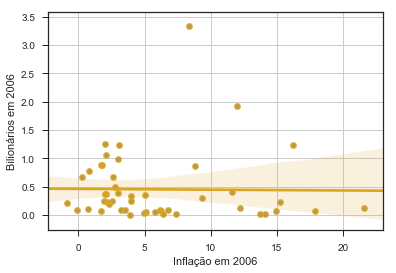

In [634]:
data.plot.scatter(x='Inflação em 2006',y='Bilionários em 2006');
sns.regplot(data["Inflação em 2006"],data["Bilionários em 2006"], color=('goldenrod'))
plt.grid()


#### Correlação entre o número de bilionários em 2006 pela inflação em 2006 ####

In [635]:
print('A correlação entre a inflação em 2006 e o número de bilionários em 2006 é:', data['Inflação em 2006'].corr(data['Bilionários em 2006']))
data.loc[:,["Inflação em 2006", "Bilionários em 2006"]].corr()

A correlação entre a inflação em 2006 e o número de bilionários em 2006 é: -0.012082259227734786


,Inflação em 2006,Bilionários em 2006
Inflação em 2006,1.000000,-0.012082
Bilionários em 2006,-0.012082,1.000000


### Análise ###

A partir da análise dos dados de 2006 verifica-se que o comportamento foi muito parecido com o comportamento de 2007, como pode-se observar nos gráficos de dispersão e na correlação entre IDH, Inflação e número de bilionários a cada 1 milhão de habitantes. 
A correlação entre IDH e Inflação em 2007 foi igual a r=-0.47, enquanto em 2006 foi igual a r=-0.41. Já a correlação entre IDH e número de bilionários em 2007 foi igual a r=0.433, enquanto em 2006 foi igual r=0.432. E por fim, a correlação entre inflação e número de bilionários em 2007 foi igual a r=-0.15, enquanto em 2006 foi igual a r=-0.012, o qual sofreu mais alteração ao longo desse ano. 

# 2005 #

### Dados ###

In [636]:
IDH = pd.read_excel('hdi_human_development_index.xlsx')
IDH = IDH.loc[:, ["geo", 2005]]
IDH= IDH.rename(columns = {'geo':'País', 2005:'IDH em 2005'})
inflation = pd.read_excel('inflation_annual_percent.xlsx')
inflation = inflation.loc[:, ["geo", 2005]]
inflation = inflation.rename(columns = {'geo':'País', 2005:'Inflação em 2005'})
billionaires = pd.read_excel('dollar_billionaires.xlsx')
billionaires = billionaires.loc[:, ["geo", 2005]]
billionaires = billionaires.rename(columns = {'geo':'País', 2005:'Bilionários em 2005'})
billionaires_sem0 = billionaires[billionaires["Bilionários em 2005"] != 0]
IDH_idx = IDH.set_index('País')
inflation_idx = inflation.set_index('País')
billionaires_idx=billionaires_sem0.set_index("País")
df = IDH_idx.join(inflation_idx, how='inner', lsuffix=' ', rsuffix=' ')
data = df.join(billionaires_idx, how="inner")

### Gráfico de dispersão sobre a Inflação em 2005 pelo IDH em 2005###

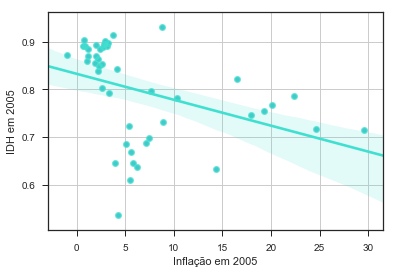

In [637]:
data.plot.scatter(x='Inflação em 2005',y='IDH em 2005');
sns.regplot(data["Inflação em 2005"],data["IDH em 2005"], color=('turquoise'))
plt.grid()

#### Correlação entre inflação em 2005 e IDH em 2005 ####

In [638]:
print('A correlação entre o IDH em 2005 e a inflação em 2005 é:', data['IDH em 2005'].corr(data['Inflação em 2005']))
data.loc[:,["IDH em 2005", "Inflação em 2005"]].corr()

A correlação entre o IDH em 2005 e a inflação em 2005 é: -0.38656443981043387


,IDH em 2005,Inflação em 2005
IDH em 2005,1.000000,-0.386564
Inflação em 2005,-0.386564,1.000000


### Gráfico de dispersão sobre o número de bilionários em 2005 pelo IDH em 2005 ###

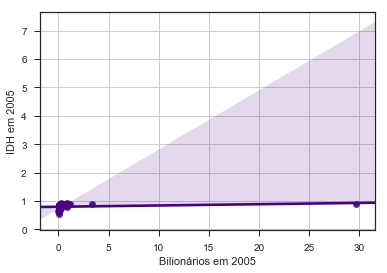

In [639]:
data.plot.scatter(x="Bilionários em 2005",y='IDH em 2005');
sns.regplot(data["Bilionários em 2005"],data["IDH em 2005"], color=('indigo'))
plt.grid()

#### Correlação entre o número de bilionários em 2005 pelo IDH em 2005 ####

In [640]:
print('A correlação entre o IDH em 2005 e o número de bilionários em 2005 é:', data['IDH em 2005'].corr(data['Bilionários em 2005']))
data.loc[:,["IDH em 2005", "Bilionários em 2005"]].corr()

A correlação entre o IDH em 2005 e o número de bilionários em 2005 é: 0.19511030268586257


,IDH em 2005,Bilionários em 2005
IDH em 2005,1.00000,0.19511
Bilionários em 2005,0.19511,1.00000


### Gráfico de dispersão sobre a Inflação em 2005 pelo número de bilionários em 2005 ###

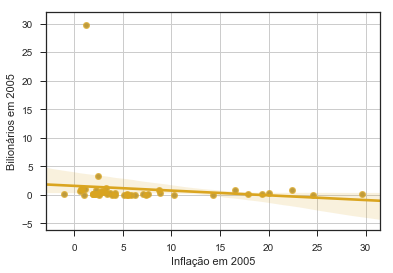

In [641]:
data.plot.scatter(x='Inflação em 2005',y='Bilionários em 2005');
sns.regplot(data["Inflação em 2005"],data["Bilionários em 2005"], color=('goldenrod'))
plt.grid()


#### Correlação entre inflação em 2005 e número de bilionários em 2005 ####

In [642]:
print('A correlação entre a inflação em 2005 e o número de bilionários em 2005 é:', data['Inflação em 2005'].corr(data['Bilionários em 2005']))
data.loc[:,["Inflação em 2005", "Bilionários em 2005"]].corr()

A correlação entre a inflação em 2005 e o número de bilionários em 2005 é: -0.13592400819945924


,Inflação em 2005,Bilionários em 2005
Inflação em 2005,1.000000,-0.135924
Bilionários em 2005,-0.135924,1.000000


### Análise ###

A partir da análise dos dados de 2005 verifica-se que o comportamento foi muito parecido com o comportamento de 2007 e 2006, como pode-se observar nos gráficos de dispersão e na correlação entre IDH, Inflação e número de bilionários a cada 1 milhão de habitantes. Apenas houve mudança de comportamento do IDH pelo número de bilionários em 2007 e 2006. Uma explicação possível seria outliers destoando o coeficiente de correlação.  
A correlação entre IDH e Inflação em 2007 foi igual a r=-0.47, em 2006 foi igual a r=-0.41, enquanto em 2007 foi igual a r=-0.38. Já a correlação entre IDH e número de bilionários em 2007 foi igual a r=0.433, em 2006 foi igual r=0.432 e em 2005 foi igual a r=0.19. E por fim, a correlação entre inflação e número de bilionários em 2007 foi igual a r=-0.15, em 2006 foi igual a r=-0.012, enquanto em 2005 foi igual a r=-0.13

# Conclusão 

** Pergunta: ** A inflação e o número de bilionários tem influência ou não no IDH de um país?

A partir dos dados aqui apresentados pode-se concluir que a inflação influencia sim no IDH de um país, mas não com tanta proporção como é comum pensar. Ademais, o IDH também tem influência sobre o número de bilionários em um país, mas também não é um fator determinante e nem tão significante quanto as pessoas pensam. Por fim, foi possível concluir que não existe muita correlação entre inflação e número de bilionários em um país, novamente indo contra ao que a maioria das pessoas pensam em relação a isso. 

Estas observações nos levam a questionar o porquê de em 2005 a correlação entre IDH e número de bilionários ter sido bem mais baixa do que em outros anos. Isso pode ser investigado em trabalhos futuros.